<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Spam SMS Classification

## Domain
SMS, Text Data

## Business Context
The SMS spam is a growing problem considering availability of cheap sms packages offered by various telecom service companies. SMS spam filtering is a relatively new task which inherits many issues and solutions from email spam filtering. The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to ham (legitimate) or spam.
 
## Objective
Given a text message and label whether a sms is a spam message, can you train a model using LSTM that allows you to correctly predict a new sms as spam or ham. 



### Package version
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Text Preprocessing

6. Model Building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

Let us check for the version andimport the necessary libraries.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 2. Setting Options

In [179]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None

## 3. Read Data

Let us now, load the image files that is available in two separate folders

In [180]:
df= pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [181]:
df.shape

(5572, 5)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [183]:
total=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
final=pd.concat([total,percentage],keys=["Total","Percentage"],axis=1)
final

,Total,Percentage
Unnamed: 4,5566,99.892319
Unnamed: 3,5560,99.784637
Unnamed: 2,5522,99.102656
v1,0,0.000000
v2,0,0.000000


In [184]:
# The columns Unnamed: 4, Unnamed: 3 , Unnamed: 2 have more than 90 % of missing values 

### Drop the columns that are not required for the model building

In [185]:
df.drop(["Unnamed: 4","Unnamed: 3","Unnamed: 2"],axis=1,inplace=True)
df_new=df

In [186]:
df_new.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [187]:
df_new.rename(columns={'v1': 'class', 'v2': 'messages'}, inplace=True)

In [188]:
df_new.head()

,class,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4. Data Analysis and Preparation

### Checking frequncy distribution of two classes

In [189]:
df_new["class"].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [190]:
df_new["class"].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

Write your observations 

### Encode the label column and make it numerical

In [191]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

class_map = {'spam': 0, 'ham': 1}

df_new['class'] = label_encode.fit_transform(df_new['class'].map(class_map))


In [192]:
df_new.head()

,class,messages
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


## 5. Text Preprocessing

Get the length of the message column and display its distribution

In [193]:
df_new['message_len'] = df['messages'].apply(len)


In [194]:
df_new.head()

,class,messages,message_len
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [195]:
df_new["message_len"].value_counts().sort_index()

2        4
3        9
4        6
5       11
6        3
7       10
8        5
9       10
10       4
11       7
12       4
13      12
14      11
15      13
16       5
17      14
18      11
19      17
20      10
21      19
22     123
23      94
24     100
25      82
26      87
27      77
28      84
29      82
30      79
31      78
32      96
33      75
34      78
35      71
36      76
37      78
38      84
39      61
40      72
41      63
42      66
43      54
44      53
45      67
46      68
47      61
48      54
49      51
50      48
51      67
52      41
53      47
54      54
55      46
56      32
57      28
58      39
59      39
60      29
61      31
62      36
63      41
64      26
65      39
66      42
67      36
68      21
69      32
70      39
71      29
72      32
73      46
74      31
75      27
76      27
77      34
78      21
79      19
80      29
81      23
82      31
83      20
84      35
85      31
86      25
87      26
88      23
89      23
90      18
91      16
92      22

visualize message length distribution for both classes

In [196]:
df_new.head()

,class,messages,message_len
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [197]:
spam_df = df_new[df_new['class'] == 0]
ham_df = df_new[df_new['class'] == 1]

In [198]:
# Histogram

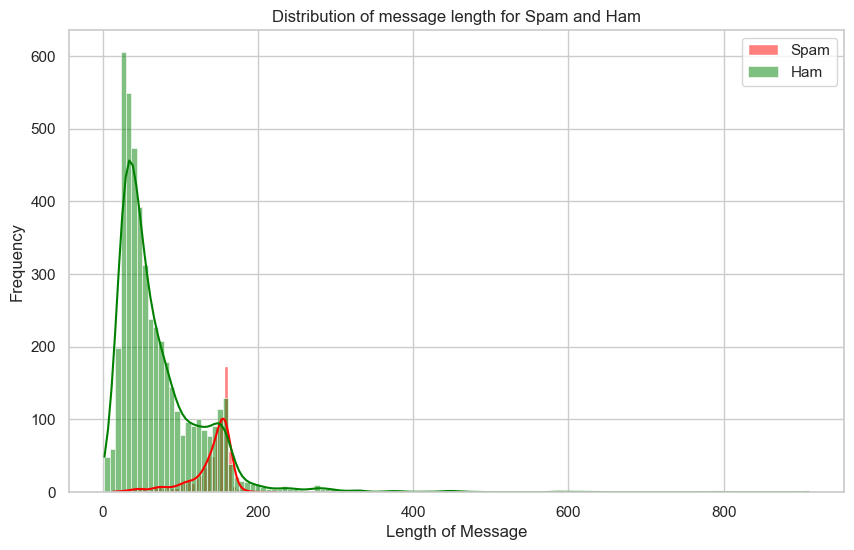

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(spam_df['message_len'], label='Spam', color='red', alpha=0.5, kde=True)
sns.histplot(ham_df['message_len'], label='Ham', color='green', alpha=0.5, kde=True)
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.title('Distribution of message length for Spam and Ham')
plt.legend()
plt.show()

In [200]:
# Boxplot 

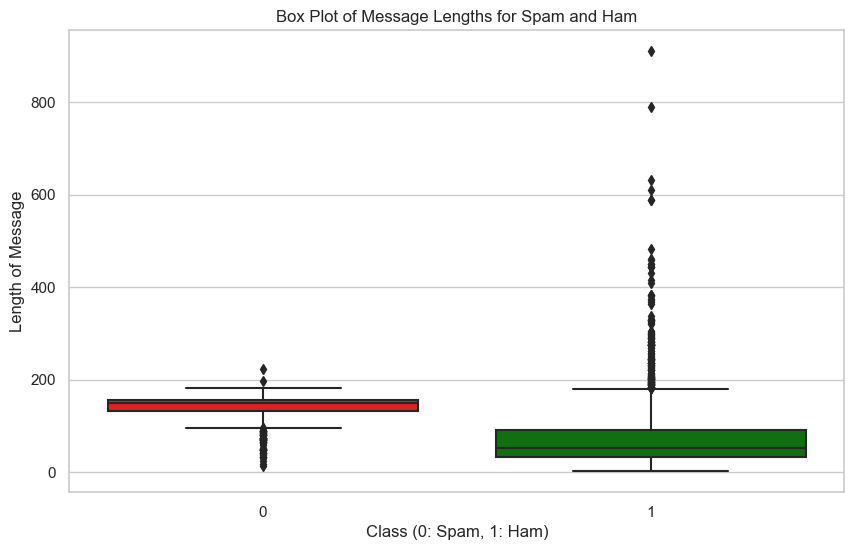

In [201]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='message_len', data=df_new, palette=['red', 'green'])
plt.xlabel('Class (0: Spam, 1: Ham)')
plt.ylabel('Length of Message')
plt.title('Box Plot of Message Lengths for Spam and Ham')
plt.show()


## Replace contractions in the text

In [202]:
df_new.head()

,class,messages,message_len
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [203]:
# To find the contraction words in each messages

In [204]:
import re

def find_contractions(text):
    
    contraction_pattern = re.compile(r'\b(?:' + '|'.join(contractions_dict.keys()) + r')\b', flags=re.IGNORECASE)
    
   
    matches = contraction_pattern.findall(text)
    
    return matches


df_new['contractions_found'] = df_new['messages'].apply(find_contractions)




In [205]:
df_new.head()

,class,messages,message_len,contractions_found
0,1,"Go until jurong point, crazy.. Available only ...",111,[]
1,1,Ok lar... Joking wif u oni...,29,[]
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,[]
3,1,U dun say so early hor... U c already then say...,49,[]
4,1,"Nah I don't think he goes to usf, he lives aro...",61,[don't]


In [206]:
from collections import Counter


all_contractions = df_new['contractions_found'].explode()


word_frequency = Counter(all_contractions)


word_frequency_dict = dict(word_frequency)


print("Unique Words and Frequencies:")
print(word_frequency_dict)


Unique Words and Frequencies:
{nan: 4507, "don't": 113, "it's": 55, "I'd": 6, "I'm": 289, "I've": 41, "i'm": 105, "we're": 16, "I'll": 137, "there's": 16, "that's": 30, "doesn't": 12, "won't": 22, "you'd": 6, "Didn't": 2, "can't": 52, "didn't": 41, "he's": 25, "haven't": 17, "You're": 9, "isn't": 9, "hasn't": 3, "shouldn't": 5, "It's": 43, "You'll": 4, "you're": 41, "you've": 8, "We'd": 3, "What's": 15, "Don't": 25, "Can't": 8, "aren't": 5, "We'll": 5, "i've": 24, "That's": 25, "you'll": 10, "i'll": 30, "YOU'RE": 1, "hadn't": 1, "we've": 2, "we'll": 15, "They're": 2, "couldn't": 5, "she's": 9, "ain't": 4, "We've": 2, "She's": 9, "Doesn't": 3, "We're": 6, "what's": 7, "they're": 5, "Hasn't": 1, "let's": 4, "He's": 5, "There's": 8, "Let's": 2, "wasn't": 11, "You'd": 2, "DIDN'T": 1, "weren't": 1, "i'd": 6, "You've": 6, "Isn't": 2, "Haven't": 5, "WOULDN'T": 1, "wouldn't": 4, "YOU'VE": 1, "THERE'S": 3, "Wasn't": 1, "we'd": 1}


In [207]:
expanded_forms = {
    "don't": "do not", "it's": "it is", "I'd": "I would", "I'm": "I am", "I've": "I have", "i'm": "I am",
    "we're": "we are", "I'll": "I will", "there's": "there is", "that's": "that is", "doesn't": "does not",
    "won't": "will not", "you'd": "you would", "Didn't": "Did not", "can't": "cannot", "didn't": "did not",
    "he's": "he is", "haven't": "have not", "You're": "You are", "isn't": "is not", "hasn't": "has not",
    "shouldn't": "should not", "It's": "It is", "You'll": "You will", "you're": "you are", "you've": "you have",
    "We'd": "We would", "What's": "What is", "Don't": "Do not", "Can't": "Cannot", "aren't": "are not",
    "We'll": "We will", "i've": "I have", "That's": "That is", "you'll": "you will", "i'll": "I will",
    "YOU'RE": "YOU ARE", "hadn't": "had not", "we've": "we have", "we'll": "we will", "They're": "They are",
    "couldn't": "could not", "she's": "she is", "ain't": "am not", "We've": "We have", "She's": "She is",
    "Doesn't": "Does not", "We're": "We are", "what's": "what is", "they're": "they are", "Hasn't": "Has not",
    "let's": "let us", "He's": "He is", "There's": "There is", "Let's": "Let us", "wasn't": "was not",
    "You'd": "You would", "DIDN'T": "DID NOT", "weren't": "were not", "i'd": "I would", "You've": "You have",
    "Isn't": "Is not", "Haven't": "Have not", "WOULDN'T": "WOULD NOT","wouldn't":"WOULD NOT","YOU'VE":"You Have",
    "THERE'S":"There is","Wasn't":"Was not","we'd":"we would"}

In [208]:
import re

def expand_contractions(text, contraction_dict):
    """
    Replace contraction words in the text with their expanded forms.

    Parameters:
    - text (str): Input text containing contractions.
    - contraction_dict (dict): Dictionary mapping contraction words to their expanded forms.

    Returns:
    - str: Text with contractions replaced by their expanded forms.
    """
    for contraction, expanded_form in contraction_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expanded_form, text, flags=re.IGNORECASE)
    return text


df_new['expanded_messages'] = df_new['messages'].apply(lambda x: expand_contractions(x, expanded_forms))


In [209]:
df_new

,class,messages,message_len,contractions_found,expanded_messages
0,1,"Go until jurong point, crazy.. Available only ...",111,[],"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...,29,[],Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,[],Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,49,[],U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,[don't],"Nah I do not think he goes to usf, he lives ar..."
5,0,FreeMsg Hey there darling it's been 3 week's n...,148,"[it's, I'd]",FreeMsg Hey there darling it is been 3 week's ...
6,1,Even my brother is not like to speak with me. ...,77,[],Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...,160,[],As per your request 'Melle Melle (Oru Minnamin...
8,0,WINNER!! As a valued network customer you have...,158,[],WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...,154,[],Had your mobile 11 months or more? U R entitle...


## Remove numbers from text

## Perform Tokenization 

## Remove stopwords

## Remove non ascii characters

## convert words to lower case

## Remove punctuations

## Lemmatize and normalize the text

In [210]:
df_new.head()

,class,messages,message_len,contractions_found,expanded_messages
0,1,"Go until jurong point, crazy.. Available only ...",111,[],"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...,29,[],Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,[],Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,49,[],U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,[don't],"Nah I do not think he goes to usf, he lives ar..."


In [211]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import unicodedata


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [212]:
def normalize_messages(messages):
    # Used to remove numbers
    messages = ''.join([char for char in messages if not char.isdigit()])

    # Used to remove Tokenization
    tokens = word_tokenize(messages)

    # Used to remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Used to remove non-ASCII characters
    tokens = [word.encode('ascii', 'ignore').decode('ascii') for word in tokens]

    # Used to convert words to lowercase
    tokens = [word.lower() for word in tokens]

    # Used to remove punctuations
    tokens = [word for word in tokens if word not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    normalized_messages = ' '.join(tokens)

    return normalized_messages

# Example usage:
# Assuming 'expanded_messages' column contains text messages with expanded forms
df_new['final_messages'] = df_new['expanded_messages'].apply(normalize_messages)




In [213]:
df_new.head()

,class,messages,message_len,contractions_found,expanded_messages,final_messages
0,1,"Go until jurong point, crazy.. Available only ...",111,[],"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...
1,1,Ok lar... Joking wif u oni...,29,[],Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,[],Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,1,U dun say so early hor... U c already then say...,49,[],U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,[don't],"Nah I do not think he goes to usf, he lives ar...",nah think go usf life around though


In [214]:
df_new.drop(["messages","message_len","contractions_found","expanded_messages"],axis=1,inplace=True)
df_final=df_new

In [215]:
df_final.head()

,class,final_messages
0,1,go jurong point crazy .. available bugis n gre...
1,1,ok lar ... joking wif u oni ...
2,0,free entry wkly comp win fa cup final tkts st ...
3,1,u dun say early hor ... u c already say ...
4,1,nah think go usf life around though


## Create dependent and independnet variables 

In [282]:
df_final['class'] = df_final['class'].astype("")


In [217]:
df_final["final_messages"]=df_final["final_messages"].astype("str")

In [283]:
df_final.dtypes

class              int32
final_messages    object
dtype: object

In [284]:
X=df_final["final_messages"]
y=df_final["class"]

## 6. Building the model based on countvectorizer

###  Naive Bayes Model

Perform train test split

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [287]:
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("Y_train:",len(Y_train))
print("Y_test:",len(Y_test))

X_train: 4457
X_test: 1115
Y_train: 4457
Y_test: 1115


Fit train data to count vectorizer

In [288]:
from sklearn.feature_extraction.text import CountVectorizer

In [289]:
count_vectorizer = CountVectorizer()

In [291]:
X_train_count=count_vectorizer.fit_transform(X_train)

Transform test data accordingly

In [292]:
X_test_count=count_vectorizer.transform(X_test)

Build the model

In [293]:
from sklearn.naive_bayes import MultinomialNB

In [294]:
naive_bayes = MultinomialNB()

In [295]:
naive_bayes.fit(X_train_count,Y_train)

MultinomialNB()

Make class predictions for X test

In [296]:
y_pred=naive_bayes.predict(X_test_count)

Calculate accuracy of class predictions

In [297]:
from sklearn.metrics import accuracy_score

In [298]:
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy is:", accuracy)

Accuracy is: 0.979372197309417


In [299]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision=precision_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
f1_score=f1_score(Y_test,y_pred)
print("Precision is:",precision)
print("Recall is:",recall)
print("F1_score:",f1_score)

Precision is: 0.9845679012345679
Recall is: 0.9917098445595854
F1_score: 0.9881259679917398


Classification Report 

In [300]:
from sklearn.metrics import classification_report

In [301]:
classification_report=classification_report(Y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       150
           1       0.98      0.99      0.99       965

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Print confusion matrix

In [302]:
from sklearn.metrics import confusion_matrix

In [303]:
conf_matrix = confusion_matrix(Y_test, y_pred)

In [304]:
print(conf_matrix)

[[135  15]
 [  8 957]]


In [ ]:
# Plotting Confusion Matrix

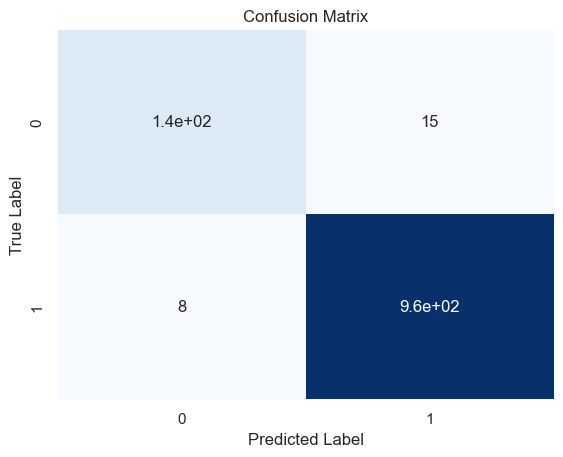

In [305]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Building model based on Term Frequency(TF) - Inverse Document Frequency(IDF)

Use TfidfVectorizer to convert text data to numbers.

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [307]:
X=df_final["final_messages"]
y=df_final["class"]

In [308]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.20)


In [309]:
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("Y_train",len(Y_train))
print("Y_test:",len(Y_test))

X_train: 4457
X_test: 1115
Y_train 4457
Y_test: 1115


In [310]:
tfidf_vectorizer = TfidfVectorizer()

In [311]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [312]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [313]:
naive_bayes_tfidf=MultinomialNB()

Build the model

In [314]:
naive_bayes_tfidf.fit(X_train_tfidf,Y_train)

MultinomialNB()

make class predictions for X_test

In [315]:
y_pred_tfidf=naive_bayes_tfidf.predict(X_test_tfidf)

calculate accuracy of class predictions

In [316]:
accuracy = accuracy_score(Y_test, y_pred_tfidf)

print("Accuracy is:", accuracy)

Accuracy is: 0.9632286995515695


In [319]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have imported the necessary functions
precision = precision_score(Y_test, y_pred_tfidf)
recall = recall_score(Y_test, y_pred_tfidf)
f1_result = f1_score(Y_test, y_pred_tfidf)

# Print the results
print("Precision is:", precision)
print("Recall is:", recall)
print("F1_score:", f1_result)


Precision is: 0.9592445328031809
Recall is: 1.0
F1_score: 0.9791983764586504


In [321]:
from sklearn.metrics import classification_report

# Assuming you have imported the necessary function
classification_rep_tfidf = classification_report(Y_test, y_pred_tfidf)

# Print the classification report
print(classification_rep_tfidf)



              precision    recall  f1-score   support

           0       1.00      0.73      0.84       150
           1       0.96      1.00      0.98       965

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



print the confusion matrix

In [322]:
conf_matrix = confusion_matrix(Y_test, y_pred_tfidf)

In [323]:
print(conf_matrix)

[[109  41]
 [  0 965]]


In [ ]:
# Plotting the confusion matrix

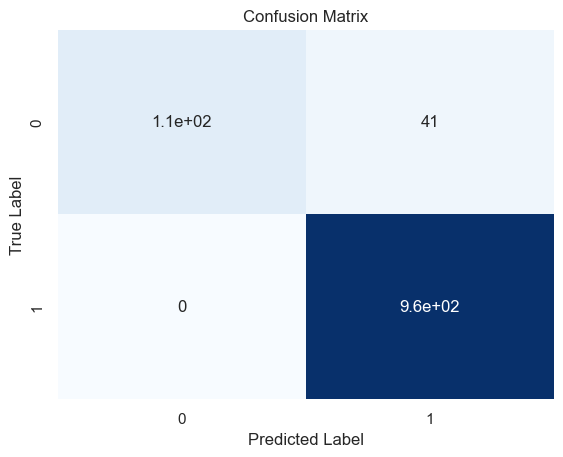

In [324]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False,
            xticklabels=naive_bayes_tfidf.classes_, yticklabels=naive_bayes_tfidf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 7. Conclusion and Interpretation


1.The CountVectorizer model outperforms the TF-IDF model in terms of accuracy, achieving 97.94% compared to 96.32%. 

2.Both models exhibit high precision, with the CountVectorizer model being slightly better at 98.46% compared to 95.92% for the TF-IDF model. Precision reflects the model's ability to correctly identify positive instances among its predictions.

3.The TF-IDF model achieves perfect recall (100%), capturing all instances of the positive class compared to countvectorizer model has a slight lower recall at 99.17%.

4.The CountVectorizer model has a higher F1 score (98.81%) compared to the TF-IDF model (97.92%). The F1 score considers both precision and recall, providing a balanced measure of the model's performance.

5.Both models perform well in distinguishing between ham and spam messages, with high precision and recall values.

6.The CountVectorizer model demonstrates slightly higher accuracy and F1 score, suggesting better overall performance on the given test set.

7.The TF-IDF model achieves perfect recall, indicating its ability to capture all instances of spam messages.